In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast # este paquete permite interpretar un string como de manera 
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original = pd.read_excel("/content/drive/MyDrive/ARTICULO_RELAVES/resultados_prediccion_modelo_entrenado_segunda_tanda_clasificacion.xlsx")


In [4]:
df_original.head()

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,categoria_paper,comentarios_cualitativos,prediction,Author Keywords,Index Keywords,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Funding Details,Funding Text 1,References,Correspondence Address,Editors,Sponsors,Publisher,Conference name,Conference date,Conference location,Conference code,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Field,Funding Text 2,Funding Text 3,Funding Text 4
0,0,"Onitiri M.A., Akinlabi E.T.",56638544900;48561117900;,Effects of Particle Size and Particle Loading ...,2017,Mechanics of Composite Materials,52,6,NaN,817,828,NaN,9.0,10.1007/s11029-017-9633-4,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Mechanical Engineering Science, ...","Onitiri, M.A., Department of Mechanical Engine...",The effect of particle size and particle loadi...,2.0,NaN,2,adhesion; epoxy; iron ore tailings; matrix; pa...,Adhesion; Filled polymers; Iron; Matrix algebr...,NaN,NaN,NaN,NaN,NaN,NaN,"Hussain, F., Hojjati, M., Okamoto, M., Gorga, ...","Onitiri, M.A.; Department of Mechanical Engine...",NaN,NaN,Springer New York LLC,NaN,NaN,NaN,NaN,01915665,NaN,NaN,NaN,English,Mech. Compos. Mater.,Article,Final,NaN,Scopus,2-s2.0-85009253229,"['ENGI', 'MATE', 'MATH', 'PHYS']",NaN,NaN,NaN
1,1,"Dadalto M.C., Rodrigues I., Claudino J., Ferna...",56022692600;57210956663;57210956085;25031601500;,Changes perceived by traditional fishing commu...,2020,International Journal of Environmental Studies,77,3,NaN,412,420,NaN,NaN,10.1080/00207233.2019.1663628,https://www.scopus.com/inward/record.uri?eid=2...,"Universidade Federal do Espírito Santo, Depart...","Dadalto, M.C., Universidade Federal do Espírit...",The paper reports a study of the responses of ...,1.0,NaN,1,Doce River; environmental disaster; Fishermen;...,Disasters; Rivers; Cultural practices; Environ...,NaN,NaN,NaN,NaN,NaN,NaN,"Polignano, M.V., Lama de Mariana pavimentou ri...","Fernandes, L.F.L.; Universidade Federal do Esp...",NaN,NaN,Routledge,NaN,NaN,NaN,NaN,00207233,NaN,IJEVA,NaN,English,Int. J. Environ. Stud.,Article,Final,NaN,Scopus,2-s2.0-85072048259,"['EART', 'ENVI', 'SOCI']",NaN,NaN,NaN
2,2,"Pedersen K.B., Reinardy H.C., Jensen P.E., Ott...",56414111800;10140239900;8201545300;7003887668;...,"The influence of Magnafloc10 on the acidic, al...",2018,Journal of Environmental Management,224,NaN,NaN,130,139,NaN,2.0,10.1016/j.jenvman.2018.07.050,https://www.scopus.com/inward/record.uri?eid=2...,"Akvaplan-niva AS, Fram Centre - High North Res...","Pedersen, K.B., Akvaplan-niva AS, Fram Centre ...",Repparfjorden in northern Norway has been part...,2.0,NaN,2,Copper; Electrokinetic remediation; Magnafloc1...,aluminum; arsenic; barium ion; cadmium; calciu...,NaN,"aluminum, 7429-90-5; arsenic, 7440-38-2; bariu...",NaN,NaN,Norges Forskningsråd: 195160,The Norwegian Defense Estates Agency and the E...,"Acar, Y.B., Alshawabkeh, A.N., Principles of e...","Pedersen, K.B.; Akvaplan-niva AS, Hjalmar Joha...",NaN,NaN,Academic Press,NaN,NaN,NaN,NaN,03014797,NaN,JEVMA,30036807.0,English,J. Environ. Manage.,Article,Final,NaN,Scopus,2-s2.0-85050122272,ENVI,NaN,NaN,NaN
3,3,"Li Q., Ma G., Li P., Su Z.",55639821500;7202152174;57219986636;53364365200;,Contrastive analysis of dynamic response of ta...,2020,E3S Web of Conferences,198,NaN,01041,NaN,NaN,NaN,NaN,10.1051/e3sconf/202019801041,https://www.scopus.com/inward/record.uri?eid=2...,"College of Architecture and Civil Engineering,...","Li, Q., College of Architecture and Civil Engi...",Construction using geofabriform is a new promi...,2.0,NaN,2,NaN,Dynamic response; Earthquakes; Geotextiles; Am...,NaN,NaN,NaN,NaN,"National Natural Science Foundation of China, ...",This work was supported by the National Natura...,"Zhou, H.M., (2011) Nonferrous Metals (Mining 

In [5]:
columnas_eliminar = ['Unnamed: 0', 'Author(s) ID', 'Title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'DOI', 'Link', 'Abstract', 'comentarios_cualitativos', 'categoria_paper', 'References', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID', 'EID', 'Conference code', 'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4']
df = df_original.drop(columnas_eliminar, axis=1)
df.head()

,Authors,Year,Source title,Cited by,Affiliations,Authors with affiliations,prediction,Author Keywords,Index Keywords,Funding Details,Correspondence Address,Editors,Sponsors,Publisher,Conference name,Conference date,Conference location,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,Field
0,"Onitiri M.A., Akinlabi E.T.",2017,Mechanics of Composite Materials,9.0,"Department of Mechanical Engineering Science, ...","Onitiri, M.A., Department of Mechanical Engine...",2,adhesion; epoxy; iron ore tailings; matrix; pa...,Adhesion; Filled polymers; Iron; Matrix algebr...,NaN,"Onitiri, M.A.; Department of Mechanical Engine...",NaN,NaN,Springer New York LLC,NaN,NaN,NaN,English,Mech. Compos. Mater.,Article,Final,NaN,Scopus,"['ENGI', 'MATE', 'MATH', 'PHYS']"
1,"Dadalto M.C., Rodrigues I., Claudino J., Ferna...",2020,International Journal of Environmental Studies,NaN,"Universidade Federal do Espírito Santo, Depart...","Dadalto, M.C., Universidade Federal do Espírit...",1,Doce River; environmental disaster; Fishermen;...,Disasters; Rivers; Cultural practices; Environ...,NaN,"Fernandes, L.F.L.; Universidade Federal do Esp...",NaN,NaN,Routledge,NaN,NaN,NaN,English,Int. J. Environ. Stud.,Article,Final,NaN,Scopus,"['EART', 'ENVI', 'SOCI']"
2,"Pedersen K.B., Reinardy H.C., Jensen P.E., Ott...",2018,Journal of Environmental Management,2.0,"Akvaplan-niva AS, Fram Centre - High North Res...","Pedersen, K.B., Akvaplan-niva AS, Fram Centre ...",2,Copper; Electrokinetic remediation; Magnafloc1...,aluminum; arsenic; barium ion; cadmium; calciu...,Norges Forskningsråd: 195160,"Pedersen, K.B.; Akvaplan-niva AS, Hjalmar Joha...",NaN,NaN,Academic Press,NaN,NaN,NaN,English,J. Environ. Manage.,Article,Final,NaN,Scopus,ENVI
3,"Li Q., Ma G., Li P., Su Z.",2020,E3S Web of Conferences,NaN,"College of Architecture and Civil Engineering,...","Li, Q., College of Architecture and Civil Engi...",2,NaN,Dynamic response; Earthquakes; Geotextiles; Am...,"National Natural Science Foundation of China, ...","Li, Q.; College of Architecture and Civil Engi...",Yang G.Ziegler M.,NaN,EDP Sciences,2020 10th Chinese Geosynthetics Conference and...,23 September 2020 through 27 September 2020,NaN,English,E3S Web Conf.,Conference Paper,Final,"All Open Access, Gold",Scopus,"['EART', 'ENER', 'ENVI']"
4,"Matthews D., Du Toit T.",2011,"IRON ORE 2011, Proceedings",6.0,"DRA mineral projects, No 3 Inyanga Close, Sunn...","Matthews, D., DRA mineral projects, No 3 Inyan...",2,NaN,Feed materials; Informed decision; Internal co...,NaN,"Matthews, D.; DRA mineral projects, No 3 Inyan...",NaN,ALS Ammtec,NaN,IRON ORE Conference 2011,11 July 2011 through 13 July 2011,"Perth, WA",English,"IRON ORE, Proc.",Conference Paper,Final,NaN,Scopus,EART


In [6]:
#Categorias de número a palabra

df.loc[df.prediction==1, 'categoria_palabra']='Retrospective' 
df.loc[df.prediction==2, 'categoria_palabra']='Prospective' 


In [7]:
df.columns = ['Authors', 'Year', 
              'Source_title', 'Cited_by', 
              'Affiliations', 'Authors_with_affiliations', 'Prediction', 'Author Keywords', 
              'Index_Keywords', 'Funding_Details',
              'Correspondence_Address', 'Editors', 'Sponsors', 'Publisher',
              'Conference_name', 'Conference_date', 'Conference_location', 'Language_of_Original_Document',
              'Abbreviated_Source_Title', 'Document_Type', 'Publication_Stage',
              'Open_Access', 'Source', 'Field', 'Category_paper']


In [8]:
#Agrupación de citas
df.loc[df.Cited_by < 5, 'Agrupación_citas']='[0-5['
df.loc[(df.Cited_by >= 5) & (df.Cited_by < 10), 'Agrupación_citas']='[5-10[' 
df.loc[(df.Cited_by >= 10) & (df.Cited_by < 15), 'Agrupación_citas']='[10-15['
df.loc[(df.Cited_by >= 15) & (df.Cited_by < 20), 'Agrupación_citas']='[15-20[' 
df.loc[(df.Cited_by >= 20) & (df.Cited_by < 25), 'Agrupación_citas']='[20-25[' 
df.loc[(df.Cited_by >= 25) & (df.Cited_by < 30), 'Agrupación_citas']='[25-30['
df.loc[df.Cited_by >= 30, 'Agrupación_citas']='30 o más' 


In [9]:
df.describe()


,Year,Cited_by,Prediction
count,8434.000000,6129.000000,8434.000000
mean,2015.842661,12.762930,1.664928
std,3.094661,21.458178,0.472044
min,2010.000000,1.000000,1.000000
25%,2013.000000,2.000000,1.000000
50%,2016.000000,6.000000,2.000000
75%,2019.000000,14.000000,2.000000
max,2020.000000,352.000000,2.000000


In [10]:
df.groupby(['Category_paper']).mean()

#Con desviacion y todo el cuento 


,Year,Cited_by,Prediction
Category_paper,,,
Prospective,2015.880171,12.255779,2.0
Retrospective,2015.768224,13.702187,1.0


In [11]:
df.pivot_table('Year', 'Category_paper')


,Year
Category_paper,
Prospective,2015.880171
Retrospective,2015.768224


In [12]:
sns.set_palette("Reds")


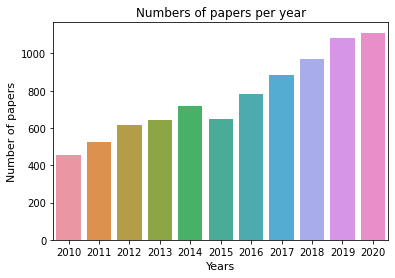

In [36]:
year = plt.figure()
años = sns.countplot(x='Year', data = df)
años.set_title("Numbers of papers per year")
plt.xlabel("Years", fontsize=11)
plt.ylabel("Number of papers", fontsize=11)
plt.show()
year.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/papers_by_year.png')

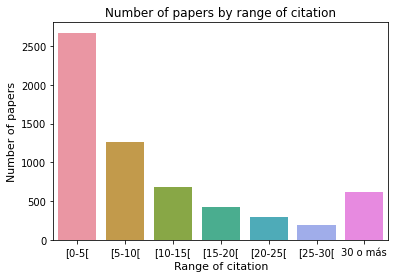

In [35]:
citation = plt.figure()
citas = sns.countplot(x='Agrupación_citas', data = df, order=['[0-5[', '[5-10[', '[10-15[', '[15-20[', '[20-25[', '[25-30[', '30 o más'])
citas.set_title("Number of papers by range of citation")
plt.xlabel("Range of citation", fontsize=11)
plt.ylabel("Number of papers", fontsize=11)
plt.show()
citation.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/number_papers_range.png')

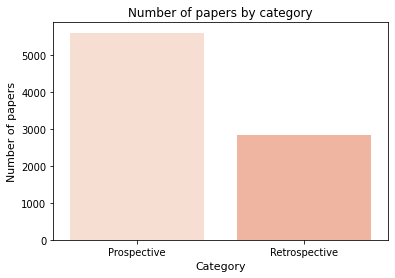

In [34]:
category1 = plt.figure()
categoria = sns.countplot(x='Category_paper', data = df)
categoria.set_title("Number of papers by category")
plt.xlabel("Category", fontsize=11)
plt.ylabel("Number of papers", fontsize=11)
plt.show()
category1.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/number_papers_category.png')

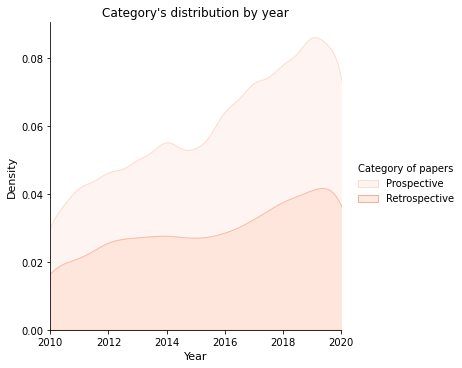

In [54]:
title_legend = 'Category of papers'
sns.displot(df, x="Year", hue="Category_paper", kind="kde", fill=True)._legend.set_title(title_legend)
plt.title("Category's distribution by year")
plt.xlabel("Year", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.xlim(2010, 2020)
plt.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/category_by_year2.png', bbox_inches='tight')
plt.show()


In [17]:
df_fields = pd.read_excel("/content/drive/MyDrive/ARTICULO_RELAVES/resultados_prediccion_modelo_entrenado_segunda_tanda_clasificacion.xlsx")


df_fields["prediction"].replace({1.0: "Retrospectivo", 2.0: "Prospectivo"}, inplace=True)


# print(len(df))
# print(df.shape)
# df_ = df.iloc[:,-4]
# print(df_)
# print(list(df.iloc[2,50:]))#pos 49
# print(list(df.index))
# Import Data
iterations = 0
for index, row in df_fields.iterrows():
    if row["Field"][0] == "[":
        iterations +=1
        # print(row["Field"])
        list_fields = ast.literal_eval(row["Field"])
        list_fields = set(list_fields)
        list_fields = list(list_fields)
        for i in list_fields:
            df_fields.loc[len(df_fields)] = list(df_fields.iloc[index,:49]) + [i] + list(df_fields.iloc[index,50:])
        #     print(list(df.iloc[-1,5:10]))
        # print(df.iloc[-3:,5:10])
print(len(df_fields))
for index, row in df_fields.iterrows():
    if isinstance(row["Field"], int):
        continue
    characteristic=row["Field"][0]
    if characteristic == "[":
        df_fields = df_fields.drop(index)
print(len(df_fields))
print("iterations", iterations)
df_fields.to_excel("/content/drive/MyDrive/ARTICULO_RELAVES/fields_separados.xlsx")



19517
15108
iterations 4409


In [18]:
df_fields['Field'].describe()

count     15108
unique       24
top        EART
freq       3489
Name: Field, dtype: object

In [55]:
df_fields.head(1)

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,categoria_paper,comentarios_cualitativos,prediction,Author Keywords,Index Keywords,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Funding Details,Funding Text 1,References,Correspondence Address,Editors,Sponsors,Publisher,Conference name,Conference date,Conference location,Conference code,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Field,Funding Text 2,Funding Text 3,Funding Text 4
2,2,"Pedersen K.B., Reinardy H.C., Jensen P.E., Ott...",56414111800;10140239900;8201545300;7003887668;...,"The influence of Magnafloc10 on the acidic, al...",2018,Journal of Environmental Management,224,NaN,NaN,130,139,NaN,2.0,10.1016/j.jenvman.2018.07.050,https://www.scopus.com/inward/record.uri?eid=2...,"Akvaplan-niva AS, Fram Centre - High North Res...","Pedersen, K.B., Akvaplan-niva AS, Fram Centre ...",Repparfjorden in northern Norway has been part...,2.0,NaN,Prospectivo,Copper; Electrokinetic remediation; Magnafloc1...,aluminum; arsenic; barium ion; cadmium; calciu...,NaN,"aluminum, 7429-90-5; arsenic, 7440-38-2; bariu...",NaN,NaN,Norges Forskningsråd: 195160,The Norwegian Defense Estates Agency and the E...,"Acar, Y.B., Alshawabkeh, A.N., Principles of e...","Pedersen, K.B.; Akvaplan-niva AS, Hjalmar Joha...",NaN,NaN,Academic Press,NaN,NaN,NaN,NaN,03014797,NaN,JEVMA,30036807.0,English,J. Environ. Manage.,Article,Final,NaN,Scopus,2-s2.0-85050122272,ENVI,NaN,NaN,NaN


In [19]:
frecuencias_fields = df_fields['Field'].value_counts()


In [20]:
frecuencias_fields


EART    3489
ENVI    3126
ENGI    2447
MATE    1289
AGRI     835
CHEM     784
ENER     551
CENG     445
PHYS     441
SOCI     252
COMP     227
MEDI     224
BIOC     214
BUSI     200
IMMU     161
MATH     121
PHAR     107
MULT      98
ECON      27
DECI      24
ARTS      16
HEAL      16
NEUR       9
VETE       5
Name: Field, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


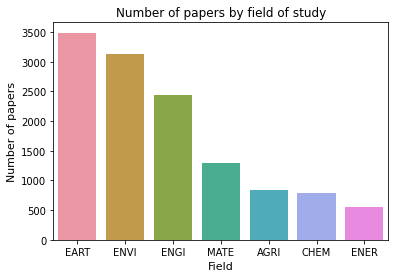

In [31]:
campos = plt.figure()
sns.countplot(df_fields['Field'], order=pd.value_counts(df_fields['Field']).iloc[:7].index).set_title("Number of papers by field of study")
plt.xlabel("Field", fontsize=11)
plt.ylabel("Number of papers", fontsize=11)
plt.show()
campos.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/number_papers_field.png')

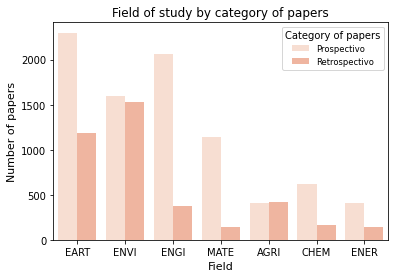

In [79]:
ax = sns.countplot(x="Field", hue="prediction", data=df_fields, order=pd.value_counts(df_fields['Field']).iloc[:7].index).set_title("Field of study by category of papers")
legend = plt.legend(title="Category of papers",
                    loc=1, fontsize='small', fancybox=True)
plt.xlabel("Field", fontsize=11)
plt.ylabel("Number of papers", fontsize=11)
plt.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/number_papers_field_by_category.png')
plt.show()



In [ ]:
campos = sns.countplot(df_fields['Field'], order=pd.value_counts(df_fields['Field']).iloc[:7].index).set_title("Number of papers by field of study")
plt.xlabel("Field", fontsize=11)
plt.ylabel("Number of papers", fontsize=11)
plt.show()
plt.savefig('/content/drive/MyDrive/ARTICULO_RELAVES/number_papers_field.png')

In [ ]:
num1=np.random.normal(loc=90,scale=5,size=100)
df1=pd.DataFrame(num1,columns=['Salary'])
df1['Type']='EmpType1'

num2=np.random.normal(loc=70,scale=5,size=100)
df2=pd.DataFrame(num2,columns=['Salary'])
df2['Type']='EmpType2'

num3=np.random.normal(loc=50,scale=5,size=100)
df3=pd.DataFrame(num3,columns=['Salary'])
df3['Type']='EmpType3'

df=pd.concat([df1,df2,df3],axis=0)

from scipy import stats

F, p = stats.f_oneway(df[df.Type=='EmpType1'].Salary,
                      df[df.Type=='EmpType2'].Salary,
                      df[df.Type=='EmpType3'].Salary)

print(F)

Importar librerías para trabajar con bases de datos relacionales. 
Son principalmente 
- pandas para trabajar con dataframes. 
- matplot lib y seaborn para diseñar gráficos. 
-  

